In [28]:
#creating a baseline matrix with all negative and 100 positives
#then undersampling the baseline matrix to get a equivalent subset
#for our case with 85 elements of negatives from 13 groups,grouped with clustered element and 366 noise we'll take 50 elements from each group to make subset of biggie negative group.
#then we'll add positives,the difference matrix will show we are in halfway.
#we'll use this later fot training a machin learning model
#importing useful python libraries first
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
os.chdir('D:\Mcvs_clermont\current working directory\cluster_groups')

In [30]:
# Load both files
df_parquet = pd.read_csv("lightcurve_features_26_negative.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")

In [31]:
# Combine to make baseline set
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
# Shuffle the combined dataset
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("baseline set with all neg and 100 pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'baseline set with all neg and 100 pos.parquet'")
print("Total rows:", len(combined))

Combined and shuffled dataset saved as 'baseline set with all neg and 100 pos.parquet'
Total rows: 1571


In [32]:
#corealtion matrix of baseline
df_combined_baseline = pd.read_parquet("baseline set with all neg and 100 pos.parquet")
features_combined_baseline = df_combined_baseline .drop(columns=['object'])
corr_combined_baseline = features_combined_baseline.corr()

In [33]:
features_combined_baseline

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
0,16.104658,16.079719,0.275773,16.110229,0.691751,0.280480,0.223662,0.665586,-0.943915,0.000123,...,0.744480,651.894741,0.228996,0.087176,0.706575,0.017124,34.641464,286.046599,-0.114433,0.886735
1,18.284940,17.232688,1.134601,18.868792,2.270712,0.361605,0.292773,3.069963,-0.884689,0.000169,...,0.634668,551.500895,0.657377,0.363324,3.056760,0.062051,70.756626,821.288483,-0.586882,0.903019
2,15.171564,15.159009,0.181192,15.170848,0.650220,0.278806,0.187474,0.406838,-0.250757,0.000055,...,0.784730,739.187643,0.147596,0.161692,0.830567,0.011943,33.423127,78.529824,0.226995,0.844526
3,15.976566,15.951539,0.214719,15.986678,0.833680,0.386419,0.210536,0.489179,-0.491081,-0.000076,...,0.867378,706.746592,0.187393,0.219078,1.047107,0.013440,36.218583,195.238960,0.065449,0.856172
4,18.650733,18.591911,0.214695,18.737732,0.522768,0.343625,0.425178,0.569489,-0.806568,0.000194,...,0.710384,369.599590,0.083839,0.367639,0.566807,0.011511,90.759503,27.144515,-0.597097,0.904202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,17.364388,17.335678,0.202778,17.408093,0.858205,0.316740,0.308967,0.570480,1.000957,0.000145,...,0.488363,583.165123,0.087821,0.497265,1.072328,0.011678,35.709418,76.886510,0.121359,0.795542
1567,16.276459,16.266405,0.187004,16.227710,0.883832,0.314081,0.224566,0.520515,0.647527,-0.000060,...,0.595561,333.049997,0.083885,0.509351,1.255658,0.011489,49.548507,76.328801,0.526362,0.772414
1568,16.179850,16.174791,0.140425,16.186563,0.568323,0.325492,0.163742,0.365974,0.630992,-0.000027,...,0.642558,1108.935013,0.080962,0.441466,0.653109,0.008679,27.279678,59.177617,-0.531466,0.728493
1569,15.533986,15.508577,0.411432,15.650111,1.141420,0.320052,0.170971,1.042116,-0.451241,0.000090,...,0.677081,1797.235556,0.328679,0.251470,1.153958,0.026486,12.211495,423.258197,-0.130320,0.852060


In [34]:
corr_combined_baseline

,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,linear_trend,...,magnitude_percentage_ratio_20_10,maximum_slope,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K
mean,1.000000,0.975702,0.337912,0.991679,0.269312,0.108596,0.064146,0.327027,-0.166912,0.027534,...,0.018959,-0.026170,0.287106,-0.269897,0.221502,0.252839,-0.019413,-0.055595,-0.284220,0.254731
weighted_mean,0.975702,1.000000,0.164851,0.962911,0.109169,0.087570,0.061213,0.157644,-0.157623,0.024023,...,0.007902,-0.061966,0.130473,-0.231826,0.068275,0.085952,-0.046891,-0.154523,-0.273158,0.189893
standard_deviation,0.337912,0.164851,1.000000,0.341706,0.899983,0.181610,0.000963,0.991379,-0.165239,0.025970,...,0.043141,0.132073,0.902986,-0.357232,0.825831,0.993109,0.158244,0.725380,-0.163505,0.376552
median,0.991679,0.962911,0.341706,1.000000,0.271495,0.112847,0.063280,0.331515,-0.164068,0.063393,...,0.021525,-0.026282,0.289028,-0.268527,0.224493,0.256952,-0.021149,-0.028014,-0.311267,0.271189
amplitude,0.269312,0.109169,0.899983,0.271495,1.000000,0.000093,-0.109066,0.883939,0.031849,0.029694,...,-0.062450,0.221270,0.770794,-0.072156,0.960166,0.893441,0.130234,0.642643,-0.053842,0.180662
beyond_1_std,0.108596,0.087570,0.181610,0.112847,0.000093,1.000000,0.363094,0.210750,-0.324663,0.018024,...,0.575161,-0.008386,0.391524,-0.588917,-0.098176,0.183551,-0.284256,0.134902,-0.301012,0.612884
cusum,0.064146,0.061213,0.000963,0.063280,-0.109066,0.363094,1.000000,-0.007756,-0.073245,0.008537,...,0.515409,-0.077507,0.070640,-0.256851,-0.098789,-0.006385,-0.014699,-0.005351,-0.103256,0.445575
inter_percentile_range_10,0.327027,0.157644,0.991379,0.331515,0.883939,0.210750,-0.007756,1.000000,-0.175126,0.034922,...,0.019227,0.122433,0.899415,-0.363343,0.800317,0.985971,0.121548,0.722014,-0.174376,0.387470
kurtosis,-0.166912,-0.157623,-0.165239,-0.164068,0.031849,-0.324663,-0.073245,-0.175126,1.000000,-0.001092,...,-0.022243,0.086827,-0.160388,0.514668,0.118019,-0.162531,0.047781,-0.098655,0.513113,-0.414322
linear_trend,0.027534,0.024023,0.025970,0.063393,0.029694,0.018024,0.008537,0.034922,-0.001092,1.000000,...,-0.008386,-0.021800,0.061882,-0.028372,0.006732,0.017917,-0.052762,0.022322,-0.080037,0.029572


In [35]:
#oading negative subsets
neg_files = sorted(glob.glob("negative_subset_group*.parquet"))

In [36]:
print(neg_files)

['negative_subset_group_1.parquet', 'negative_subset_group_10.parquet', 'negative_subset_group_11.parquet', 'negative_subset_group_12.parquet', 'negative_subset_group_13.parquet', 'negative_subset_group_14_noise.parquet', 'negative_subset_group_2.parquet', 'negative_subset_group_3.parquet', 'negative_subset_group_4.parquet', 'negative_subset_group_5.parquet', 'negative_subset_group_6.parquet', 'negative_subset_group_7.parquet', 'negative_subset_group_8.parquet', 'negative_subset_group_9.parquet']


In [37]:
#for fetching 50 elements from each neg file manually
sampled_list = []
seen_objects = set()     # To track unique objects across all groups

for f in neg_files:
    df = pd.read_parquet(f)

    # Remove any objects already selected before sampling
    df_unique = df[~df["object"].isin(seen_objects)]

    # Sample up to 50 available unique objects from this group
    n = min(50, len(df_unique))
    sampled = df_unique.sample(n, random_state=42)

    # Add to our list
    sampled_list.append(sampled)

    # Update the set of seen objects
    seen_objects.update(sampled["object"].tolist())

# Combine all 14 groups' samples
final_700 = pd.concat(sampled_list, ignore_index=True)

print(final_700)
print("Total unique sampled objects:", final_700["object"].nunique())

           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
695  ZTF18aazlsgh  14.882592      14.881386            0.103035  14.883153   
696  ZTF18aayuzaj  13.688346      13.685163            0.358838  13.631022   
697  ZTF18abjskiq  16.131228      16.118649            0.227765  16.130015   
698  ZTF18aawkmkd  15.573213      15.563415            0.205056  15.493747   
699  ZTF18abccppo  14.668199      14.666466            0.107532  14.669506   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [38]:
#for fetching 50 elements from each net file using pre defined fuction
from function import sample_unique_from_negative_subsets
final_50 = sample_unique_from_negative_subsets(file_list = neg_files,samples_per_group = 50) #for fetching 50 elements from each group

print(final_50)
print("Total unique objects:", final_50["object"].nunique())


           object       mean  weighted_mean  standard_deviation     median  \
0    ZTF18aaxyuxl  16.354319      16.333272            0.270252  16.427167   
1    ZTF18aaxaoau  15.720052      15.713978            0.163797  15.779869   
2    ZTF18abjwfce  15.530978      15.527124            0.209941  15.516777   
3    ZTF18acvwwcb  15.765434      15.764291            0.085287  15.755574   
4    ZTF18abajgal  15.954566      15.949912            0.133589  15.904966   
..            ...        ...            ...                 ...        ...   
695  ZTF18aazlsgh  14.882592      14.881386            0.103035  14.883153   
696  ZTF18aayuzaj  13.688346      13.685163            0.358838  13.631022   
697  ZTF18abjskiq  16.131228      16.118649            0.227765  16.130015   
698  ZTF18aawkmkd  15.573213      15.563415            0.205056  15.493747   
699  ZTF18abccppo  14.668199      14.666466            0.107532  14.669506   

     amplitude  beyond_1_std     cusum  inter_percentile_range_

In [39]:
# Save to parquet
final_50.to_parquet("sampled_negative_50.parquet", index=False)

print("Saved to sampled_negative_50.parquet")

Saved to sampled_negative_50.parquet


In [40]:
df=pd.read_parquet('sampled_negative_50.parquet') #loading file for checking

In [41]:
df

,object,mean,weighted_mean,standard_deviation,median,amplitude,beyond_1_std,cusum,inter_percentile_range_10,kurtosis,...,median_absolute_deviation,median_buffer_range_percentage_10,percent_amplitude,mean_variance,anderson_darling_normal,chi2,skew,stetson_K,cluster,cluster_id
0,ZTF18aaxyuxl,16.354319,16.333272,0.270252,16.427167,0.839879,0.315376,0.191100,0.798352,0.251133,...,0.083699,0.500000,1.071574,0.016525,70.900849,220.816598,-0.730510,0.780714,1,1
1,ZTF18aaxaoau,15.720052,15.713978,0.163797,15.779869,0.920052,0.318083,0.185798,0.421481,2.162836,...,0.079010,0.526144,1.300966,0.010420,49.873646,102.643327,-0.069234,0.820982,1,1
2,ZTF18abjwfce,15.530978,15.527124,0.209941,15.516777,0.588209,0.348927,0.349168,0.527076,-0.988845,...,0.203831,0.170061,0.689037,0.013518,52.108592,151.882731,-0.317724,0.868797,1,1
3,ZTF18acvwwcb,15.765434,15.764291,0.085287,15.755574,0.627195,0.288340,0.308889,0.231670,8.860717,...,0.038209,0.634693,0.960885,0.005410,24.219243,17.502761,1.110613,0.729606,1,1
4,ZTF18abajgal,15.954566,15.949912,0.133589,15.904966,1.189068,0.187457,0.232452,0.267652,16.219306,...,0.060776,0.698023,1.658087,0.008373,43.704291,52.964607,2.015123,0.777978,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,ZTF18aazlsgh,14.882592,14.881386,0.103035,14.883153,0.881496,0.281798,0.304083,0.226656,28.778627,...,0.087200,0.509868,1.412951,0.006923,34.310695,42.398529,2.093841,0.824159,1,1
696,ZTF18aayuzaj,13.688346,13.685163,0.358838,13.631022,1.704284,0.301001,0.170863,0.969517,0.810235,...,0.210744,0.437644,2.291209,0.026215,20.932565,520.519968,0.432772,0.768013,1,1
697,ZTF18abjskiq,16.131228,16.118649,0.227765,16.130015,0.441685,0.413831,0.353893,0.636843,-1.025178,...,0.211131,0.145993,0.463931,0.014120,43.982411,150.631356,-0.404476,0.848817,1,1
698,ZTF18aawkmkd,15.573213,15.563415,0.205056,15.493747,0.575639,0.215368,0.085397,0.437313,1.427026,...,0.096851,0.312229,0.865342,0.013167,80.793755,196.480788,1.338221,0.799289,1,1


In [42]:
#for having rest data 
remaining_list = []

# seen_objects contains the 700 sampled ones from your previous code
for f in neg_files:
    df = pd.read_parquet(f)

    # Remaining objects = total − sampled
    remaining = df[~df["object"].isin(seen_objects)]

    remaining_list.append(remaining)

# Combine remaining from all 14 files
remaining_all = pd.concat(remaining_list, ignore_index=True)

print("Total remaining objects:", remaining_all["object"].nunique())
print(remaining_all.head())


Total remaining objects: 771
         object       mean  weighted_mean  standard_deviation     median  \
0  ZTF18aawacoh  16.921257      16.508486            0.927426  17.339954   
1  ZTF18aayecqh  14.138779      14.135098            0.089374  14.111984   
2  ZTF18aayedvx  14.344487      14.342129            0.193407  14.387081   
3  ZTF18aawkmkc  15.095712      15.092181            0.171978  15.060401   
4  ZTF18aawacbm  16.070053      16.058632            0.221727  16.135805   

   amplitude  beyond_1_std     cusum  inter_percentile_range_10  kurtosis  \
0   2.078099      0.298969  0.207789                   2.534733 -0.074856   
1   0.539448      0.323249  0.321063                   0.237618  2.982943   
2   0.587102      0.279716  0.211211                   0.489042  0.055415   
3   0.471860      0.428186  0.112233                   0.451537 -1.213320   
4   0.731493      0.313725  0.192081                   0.616687  0.138785   

   ...  median_absolute_deviation  median_buffer_ra

In [43]:
remaining_all.to_parquet("remaining_negative_subset.parquet", index=False) #remaining 85-50=15 elements from 13 groups and 366-50=316 from noise


In [44]:
#subset of given baseline matrix
import pandas as pd
df_parquet = pd.read_parquet("sampled_negative_50.parquet")
df_csv = pd.read_csv("positive_100_elements.csv")
# Combine
combined = pd.concat([df_parquet, df_csv], ignore_index=True)
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
combined.to_parquet("subset of baseline with samples 50neg & pos.parquet", index=False)

print("Combined and shuffled dataset saved as 'subset of baseline with 50neg & pos.parquet'")
print("Total rows:", len(combined))


Combined and shuffled dataset saved as 'subset of baseline with 50neg & pos.parquet'
Total rows: 800


In [45]:
#corr space determination
df_combined_baseline_subset_sampled_50 = pd.read_parquet("subset of baseline with samples 50neg & pos.parquet") # dataframe
features_combined_baseline_subset_sampled_50 = df_combined_baseline_subset_sampled_50 .drop(columns=['object','cluster','cluster_id'])# removing nonnumeric columns
corr_combined_baseline_subset_sampled_50 = features_combined_baseline_subset_sampled_50.corr()#converting them into feature correlation matrix

In [46]:
corr_diff_9 = (corr_combined_baseline-corr_combined_baseline_subset_sampled_50) #correlation run


In [47]:
#for better tolerance of corr matrix
corr_diff_clean_9 = corr_diff_9.copy()
corr_diff_clean_9[np.abs(corr_diff_clean_9) < 1e-3] = 0

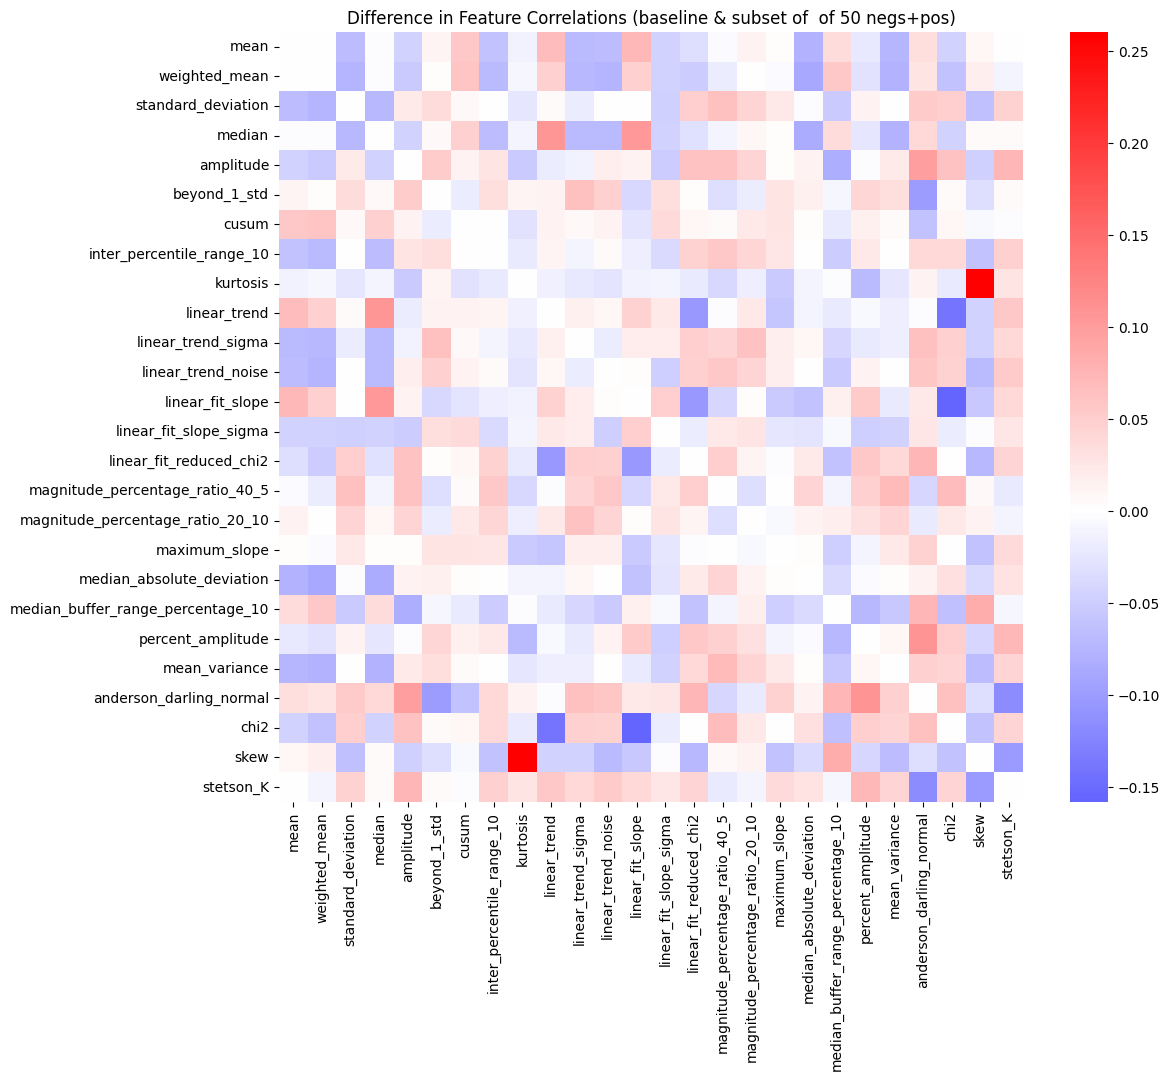

In [49]:
#plotting difference matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_clean_9, cmap='bwr', center=0)#, vmin=-0.5, vmax=0.5)
plt.title('Difference in Feature Correlations (baseline & subset of  of 50 negs+pos)')
#plt.tight_layout()
plt.show()